Sanity Check
--

Fit some approximations to a model with a *Gaussian* likelihood. Make sure they're all the same. 

In [1]:
import GPflow
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

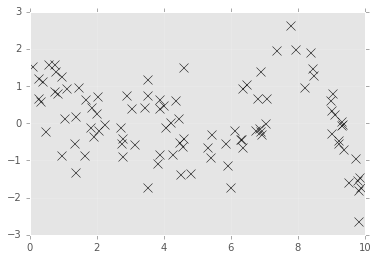

In [2]:
X = np.random.rand(100,1)*10
Y = np.sin(X) + 0.9 * np.cos(X*1.6) + np.random.randn(*X.shape)* 0.8
plt.plot(X, Y, 'kx')

In [3]:
m1 = GPflow.gpr.GPR(X, Y, kern=GPflow.kernels.RBF(1))
m2 = GPflow.vgp.VGP(X, Y, GPflow.kernels.RBF(1), likelihood=GPflow.likelihoods.Gaussian())
m3 = GPflow.svgp.SVGP(X, Y, GPflow.kernels.RBF(1)+GPflow.kernels.White(1), likelihood=GPflow.likelihoods.Gaussian(), Z=X.copy(), q_diag=False)
m3.Z.fixed = True
m4 = GPflow.svgp.SVGP(X, Y, GPflow.kernels.RBF(1)+GPflow.kernels.White(1), likelihood=GPflow.likelihoods.Gaussian(), Z=X.copy(), q_diag=False, whiten=True)
m4.Z.fixed=True

In [4]:
m1.optimize()
m2.optimize()
m3.optimize()
m4.optimize()

compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state
compiling tensorflow function...
done
optimization terminated, setting model state


   status: 0
  success: True
     nfev: 356
 hess_inv: <10104x10104 LbfgsInvHessProduct with dtype=float64>
      fun: 117.34354234489605
        x: array([  0.13013617,   0.        ,   0.        , ...,   1.05564051,
       -15.69133209,  -0.51759014])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
      jac: array([ -2.47433205e-04,  -0.00000000e+00,  -0.00000000e+00, ...,
        -9.09679805e-05,   2.16956547e-05,  -4.92438974e-05])
      nit: 343

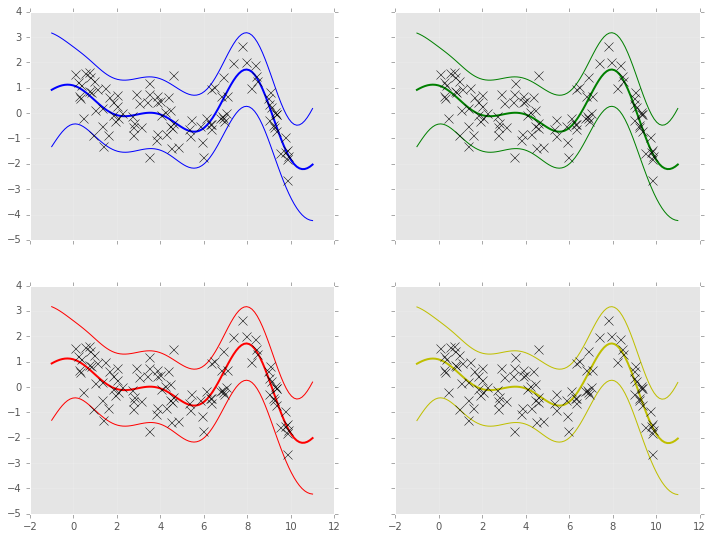

In [5]:
xx = np.linspace(-1, 11, 100)[:,None]


def plot(m, color, ax):
    mu, var = m.predict_y(xx)
    ax.plot(xx, mu, color, lw=2)
    ax.plot(xx, mu+ 2*np.sqrt(var), color, xx, mu-2*np.sqrt(var), color, lw=1)
    ax.plot(X, Y, 'kx')

f, ax = plt.subplots(2,2,sharex=True, sharey=True, figsize=(12,9))
plot(m1, 'b', ax[0,0])
plot(m2, 'r', ax[1,0])
plot(m3, 'g', ax[0,1])
plot(m4, 'y', ax[1,1])


In [6]:
m1.kern

Name,values,prior,constriant
kern.lengthscales,[ 1.35348136],None,+ve
kern.variance,[ 1.74317205],None,+ve


In [7]:
m2.kern

Name,values,prior,constriant
kern.lengthscales,[ 1.35463232],None,+ve
kern.variance,[ 1.74044911],None,+ve


In [8]:
m3.kern

Name,values,prior,constriant
kern.white.variance,[ 3.47578484e-07],None,+ve
kern.rbf.variance,[ 1.73969603],None,+ve
kern.rbf.lengthscales,[ 1.3527553],None,+ve


In [9]:
m4.kern

Name,values,prior,constriant
kern.rbf.variance,[ 1.74673019],None,+ve
kern.rbf.lengthscales,[ 1.35423988],None,+ve
kern.white.variance,[ 1.53229021e-07],None,+ve


In [10]:
print -m1._objective(m1.get_free_state())[0]
print -m2._objective(m2.get_free_state())[0]
print -m3._objective(m3.get_free_state())[0]
print -m4._objective(m4.get_free_state())[0]

-117.343505041
[-117.34549444]
-117.343567325
-117.343542345
